<a href="https://colab.research.google.com/github/Harsh374/Elevate-Labs-Task-7/blob/main/7Elevate_Labs_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 7: Support Vector Machines (SVM)**

*   Objective: Use SVMs for linear and non-linear classification.
*   Tools:  Scikit-learn, NumPy, Matplotlib
*   Dataset: Breast Cancer Dataset
*   What You'll Learn : Margin maximization, kernel trick, hyperparameter tuning.

# Import Libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

# 1. Load and prepare the dataset

In [94]:
print("Loading and preparing the Breast Cancer Dataset...")
data = pd.read_csv('/content/Breast Cancer Wisconsin (Diagnostic) Data Set.csv')
print(f"Dataset shape: {data.shape}")
print(data.head())

Loading and preparing the Breast Cancer Dataset...
Dataset shape: (569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980            

In [95]:
# Initial check for missing values
print("\nMissing values in each column:")
missing_values = data.isnull().sum()
print(missing_values)


Missing values in each column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal

In [96]:
# Check for suspicious columns like 'Unnamed: 32' that might be empty
print("\nChecking for problematic columns...")
for col in data.columns:
    if 'Unnamed' in col or data[col].isna().all():
        print(f"Dropping column {col} because it's empty or unnamed")
        data = data.drop(col, axis=1)


Checking for problematic columns...
Dropping column Unnamed: 32 because it's empty or unnamed


In [97]:
# Drop the 'id' column if it exists
if 'id' in data.columns:
    print("Dropping 'id' column...")
    data = data.drop('id', axis=1)

Dropping 'id' column...


In [98]:
# Check the distribution of the target variable
print("\nDistribution of diagnosis:")
print(data['diagnosis'].value_counts())
print(data['diagnosis'].value_counts(normalize=True).round(2))


Distribution of diagnosis:
diagnosis
B    357
M    212
Name: count, dtype: int64
diagnosis
B    0.63
M    0.37
Name: proportion, dtype: float64


In [99]:
# Convert diagnosis to binary: M (malignant) -> 1, B (benign) -> 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [100]:
# Handle any remaining missing values
print("\nHandling remaining missing values...")
# Check for missing values again after preprocessing
missing_vals = data.isnull().sum()
cols_with_missing = missing_vals[missing_vals > 0].index.tolist()

if cols_with_missing:
    print(f"Columns with remaining missing values: {cols_with_missing}")
    print("Using SimpleImputer to fill missing values with the mean...")
    # Create an imputer
    imputer = SimpleImputer(strategy='mean')
    # Get feature columns (all except diagnosis)
    feature_cols = [col for col in data.columns if col != 'diagnosis']
    # Apply imputer to features only
    data[feature_cols] = pd.DataFrame(
        imputer.fit_transform(data[feature_cols]),
        columns=feature_cols,
        index=data.index
    )
else:
    print("No missing values found after preprocessing.")


Handling remaining missing values...
No missing values found after preprocessing.


In [101]:
# Split features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [102]:
# Final verification
print(f"\nFinal shape of features: {X.shape}")
print(f"NaN values remaining in features: {X.isnull().sum().sum()}")


Final shape of features: (569, 30)
NaN values remaining in features: 0


In [103]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"NaN values in X_train_scaled: {np.isnan(X_train_scaled).sum().sum()}")
print(f"NaN values in X_test_scaled: {np.isnan(X_test_scaled).sum().sum()}")

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (455, 30)
Testing set shape: (114, 30)
NaN values in X_train_scaled: 0
NaN values in X_test_scaled: 0

Training set shape: (455, 30)
Testing set shape: (114, 30)


# 2. Train an SVM with linear kernel

In [105]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [106]:
# Evaluate the linear SVM
y_pred_linear = svm_linear.predict(X_test_scaled)
linear_accuracy = accuracy_score(y_test, y_pred_linear)
print(f"Linear SVM Accuracy: {linear_accuracy:.4f}")
print("\nClassification Report (Linear SVM):")
print(classification_report(y_test, y_pred_linear))

Linear SVM Accuracy: 0.9561

Classification Report (Linear SVM):
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [107]:
# Train an SVM with RBF kernel
print("\nTraining SVM with RBF kernel...")
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)


Training SVM with RBF kernel...


SVC(random_state=42)

In [108]:
# Evaluate the RBF SVM
y_pred_rbf = svm_rbf.predict(X_test_scaled)
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
print(f"RBF SVM Accuracy: {rbf_accuracy:.4f}")
print("\nClassification Report (RBF SVM):")
print(classification_report(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9825

Classification Report (RBF SVM):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# 3. Visualize the decision boundary using 2D data

In [109]:
# Use PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [110]:
# Train SVMs on the PCA-transformed data
svm_linear_pca = SVC(kernel='linear', random_state=42)
svm_linear_pca.fit(X_train_pca, y_train)

svm_rbf_pca = SVC(kernel='rbf', random_state=42)
svm_rbf_pca.fit(X_train_pca, y_train)

SVC(random_state=42)

In [111]:
# Create a meshgrid to plot the decision boundary
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions on the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.colorbar()
    plt.show()

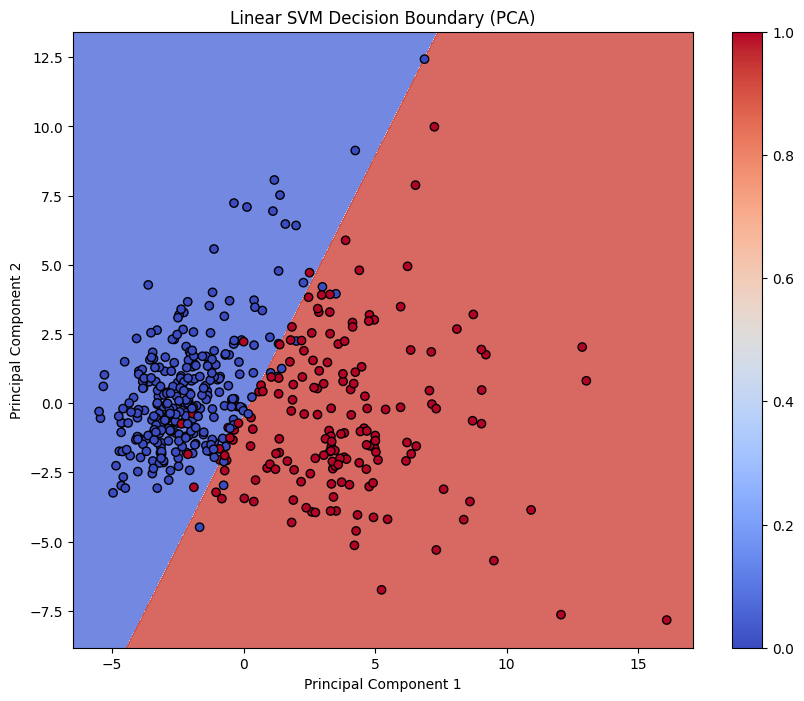

In [112]:
# Plot decision boundaries
plot_decision_boundary(X_train_pca, y_train, svm_linear_pca, 'Linear SVM Decision Boundary (PCA)')

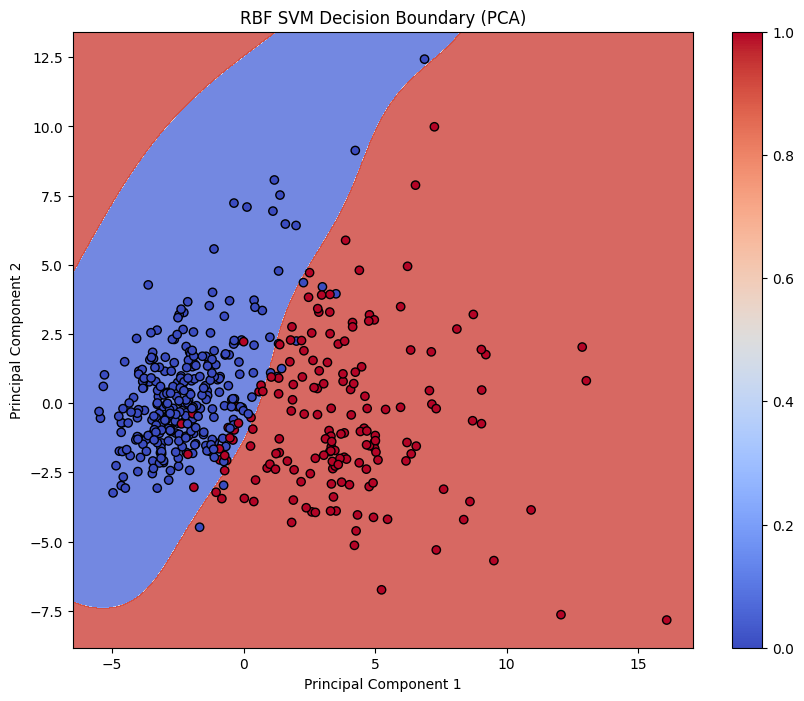

In [113]:
plot_decision_boundary(X_train_pca, y_train, svm_rbf_pca, 'RBF SVM Decision Boundary (PCA)')

# 4. Tune hyperparameters like C and gamma

In [114]:
# Define parameter grid for linear SVM
param_grid_linear = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

In [115]:
# Define parameter grid for RBF SVM
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale', 'auto']
}

In [116]:
# Perform GridSearchCV for linear SVM
grid_search_linear = GridSearchCV(SVC(kernel='linear', random_state=42),
                                  param_grid_linear,
                                  cv=5,
                                  scoring='accuracy',
                                  verbose=1)

grid_search_linear.fit(X_train_scaled, y_train)
print("\nBest parameters for Linear SVM:")
print(grid_search_linear.best_params_)
print(f"Best cross-validation accuracy: {grid_search_linear.best_score_:.4f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters for Linear SVM:
{'C': 0.1, 'gamma': 'scale'}
Best cross-validation accuracy: 0.9736


In [84]:
# Perform GridSearchCV for RBF SVM
grid_search_rbf = GridSearchCV(SVC(kernel='rbf', random_state=42),
                               param_grid_rbf,
                               cv=5,
                               scoring='accuracy',
                               verbose=1)

grid_search_rbf.fit(X_train_scaled, y_train)
print("\nBest parameters for RBF SVM:")
print(grid_search_rbf.best_params_)
print(f"Best cross-validation accuracy: {grid_search_rbf.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters for RBF SVM:
{'C': 1, 'gamma': 'scale'}
Best cross-validation accuracy: 0.9758


In [85]:
# Test the best models on the test set
best_linear_model = grid_search_linear.best_estimator_
best_rbf_model = grid_search_rbf.best_estimator_

y_pred_best_linear = best_linear_model.predict(X_test_scaled)
y_pred_best_rbf = best_rbf_model.predict(X_test_scaled)

print("\nBest Linear SVM Test Accuracy:", accuracy_score(y_test, y_pred_best_linear))
print("Best RBF SVM Test Accuracy:", accuracy_score(y_test, y_pred_best_rbf))


Best Linear SVM Test Accuracy: 0.9824561403508771
Best RBF SVM Test Accuracy: 0.9824561403508771


# 5. Use cross-validation to evaluate performance

In [86]:
# Prepare full dataset for cross-validation - ensure no NaNs
X_full = data.drop('diagnosis', axis=1)
y_full = data['diagnosis']
X_scaled = scaler.fit_transform(X_full)

In [87]:
# Perform cross-validation on the best models
cv_scores_linear = cross_val_score(best_linear_model, X_scaled, y_full, cv=10)
cv_scores_rbf = cross_val_score(best_rbf_model, X_scaled, y_full, cv=10)

print(f"Linear SVM Cross-Validation Scores: {cv_scores_linear}")
print(f"Linear SVM Mean Cross-Validation Score: {cv_scores_linear.mean():.4f}")
print(f"Linear SVM Standard Deviation: {cv_scores_linear.std():.4f}")

print(f"\nRBF SVM Cross-Validation Scores: {cv_scores_rbf}")
print(f"RBF SVM Mean Cross-Validation Score: {cv_scores_rbf.mean():.4f}")
print(f"RBF SVM Standard Deviation: {cv_scores_rbf.std():.4f}")

Linear SVM Cross-Validation Scores: [0.98245614 0.96491228 0.98245614 0.98245614 1.         0.98245614
 0.92982456 1.         1.         0.96428571]
Linear SVM Mean Cross-Validation Score: 0.9789
Linear SVM Standard Deviation: 0.0205

RBF SVM Cross-Validation Scores: [0.98245614 0.96491228 0.94736842 0.98245614 1.         1.
 0.94736842 1.         1.         0.94642857]
RBF SVM Mean Cross-Validation Score: 0.9771
RBF SVM Standard Deviation: 0.0224


In [88]:
# Confusion matrices for both models
print("\nConfusion Matrix (Best Linear SVM):")
print(confusion_matrix(y_test, y_pred_best_linear))

print("\nConfusion Matrix (Best RBF SVM):")
print(confusion_matrix(y_test, y_pred_best_rbf))


Confusion Matrix (Best Linear SVM):
[[71  0]
 [ 2 41]]

Confusion Matrix (Best RBF SVM):
[[71  0]
 [ 2 41]]


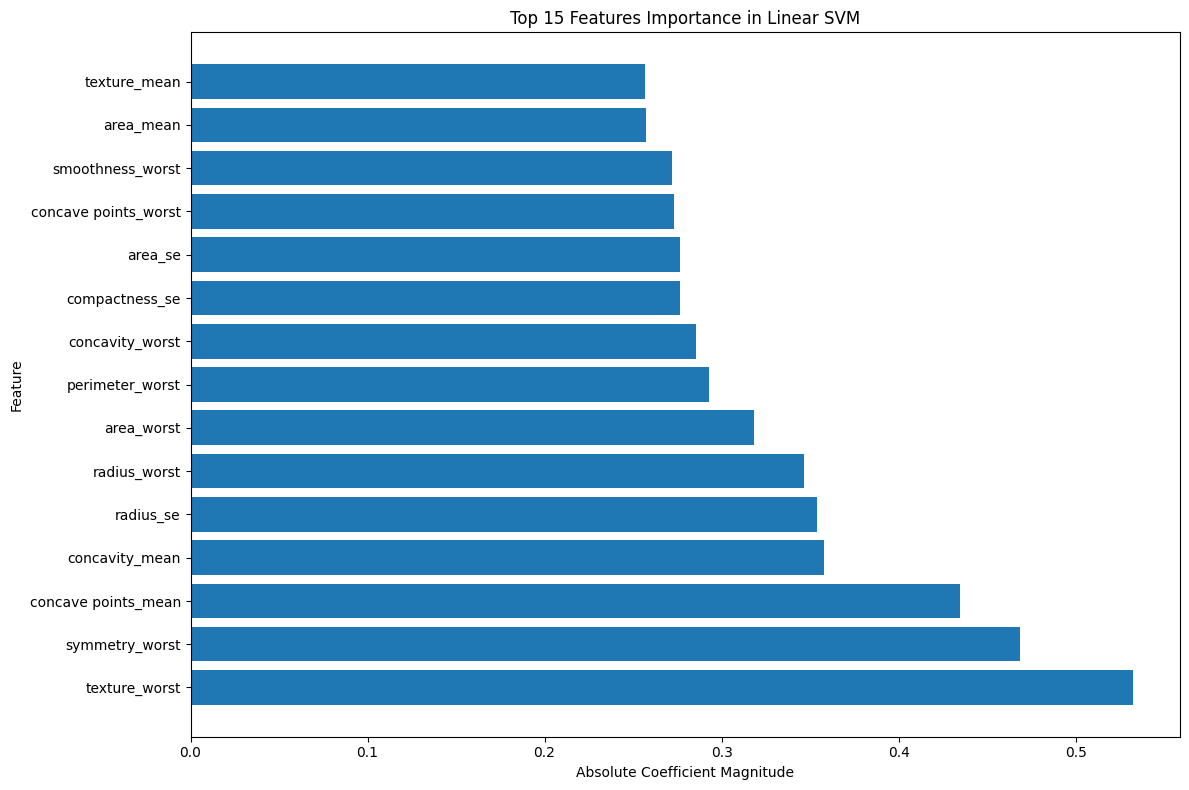


Top 5 Most Important Features:
                Feature  Importance
21        texture_worst    0.532363
28       symmetry_worst    0.468451
7   concave points_mean    0.434437
6        concavity_mean    0.357991
10            radius_se    0.354165


In [89]:
# Additional visualization: Feature importance for linear SVM
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(best_linear_model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.barh(feature_importance['Feature'][:15], feature_importance['Importance'][:15])
plt.xlabel('Absolute Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Top 15 Features Importance in Linear SVM')
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance.head(5))

In [90]:
# Plot learning curves to assess potential overfitting/underfitting
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=5):
    plt.figure(figsize=(10, 6))
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy"
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [91]:
# Prepare scaled data for learning curves
X_scaled = scaler.fit_transform(X)

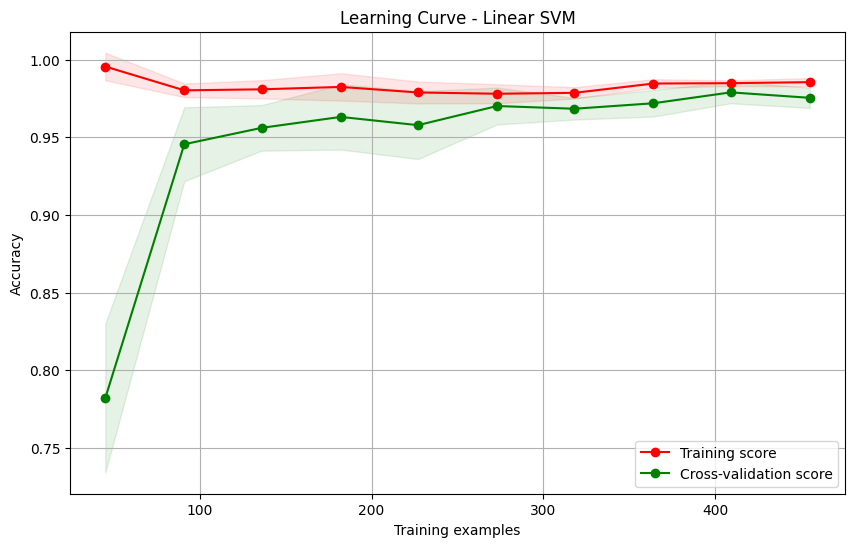

In [117]:
# Plot learning curves
plot_learning_curve(best_linear_model, "Learning Curve - Linear SVM", X_scaled, y)

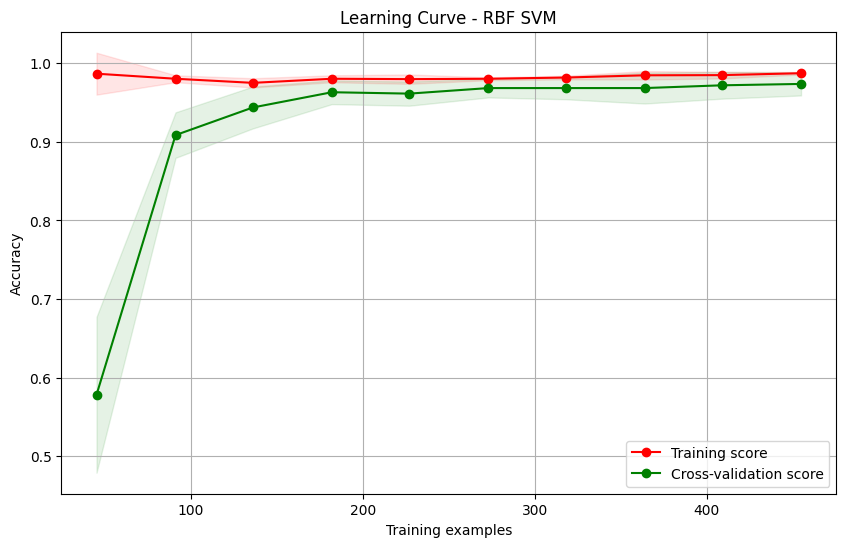

In [118]:
plot_learning_curve(best_rbf_model, "Learning Curve - RBF SVM", X_scaled, y)

# **SVM Analysis Complete!**